In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## 프로젝트 목적
## mpg 데이터에 대해 상세히 살피고
## 판다스 기능 및 각종 그래프 그리기 숙달


In [7]:

data = pd.read_csv('../DATA/auto_mpg.csv', encoding='euc-kr')
mpgDF = pd.DataFrame(data)
mpgDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70,1,buick skylark 320
2,18.0,8.0,318.0,150,3436.0,11.0,70,1,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70,1,amc rebel sst
4,17.0,8.0,302.0,140,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
399,31.0,4.0,119.0,82,2720.0,19.4,82,1,chevy s-10
400,27.0,4.0,140.0,86,NaN,15.6,82,1,ford mustang gl
401,44.0,4.0,97.0,NaN,NaN,24.6,82,2,vw pickup
402,22.0,6.0,232.0,NaN,2835.0,14.7,82,1,ford granada l


In [8]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           404 non-null    float64
 1   cylinders     403 non-null    float64
 2   displacement  404 non-null    float64
 3   horsepower    401 non-null    object 
 4   weight        402 non-null    float64
 5   acceleration  404 non-null    float64
 6   model year    404 non-null    int64  
 7   origin        404 non-null    int64  
 8   car name      404 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.5+ KB


In [11]:
mpgDF['horsepower'] = mpgDF['horsepower'].str.replace('?','0')
mpgDF['horsepower'] = mpgDF['horsepower'].astype('float')

In [15]:
mpgDF.isna().sum()
mpgDF = mpgDF.ffill()

In [24]:
mpgDF['maker'] = mpgDF['car name'].apply(lambda x: x.split()[0])

In [27]:
mpgDF['maker'].value_counts()

maker
ford             54
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
vw                7
audi              7
chrysler          6
volvo             6
renault           5
saab              4
chevy             4
subaru            4
opel              4
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: count, dtype: int64

In [35]:
bdf = mpgDF.loc[:10,['horsepower', 'maker']].sort_values('horsepower')

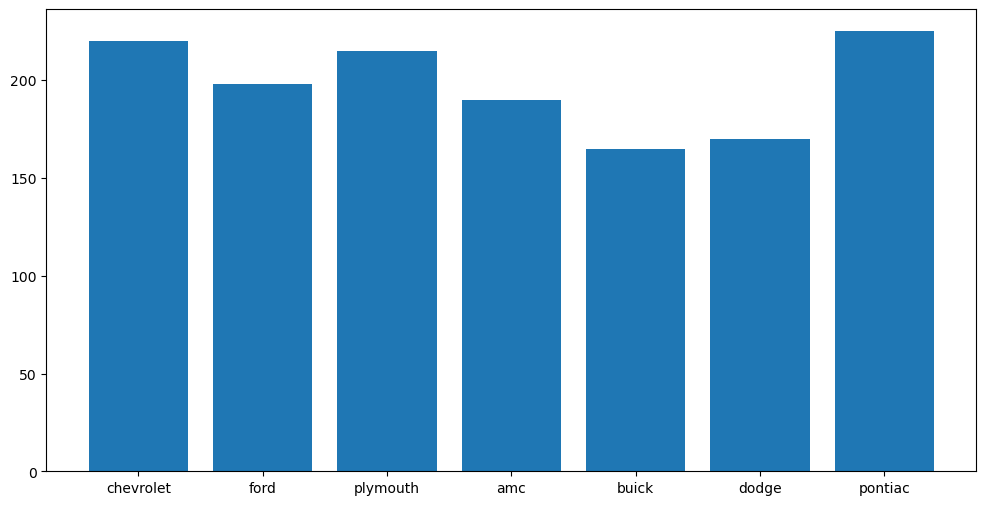

In [39]:
## maker와 다른 속성과의 상관관계.
plt.figure(figsize=(12,6))

xdata = bdf['maker']
ydata = bdf['horsepower']

plt.bar(xdata,ydata)

plt.show()

In [58]:
sdf = mpgDF.loc[:,['displacement', 'horsepower','maker']]

<Axes: xlabel='displacement', ylabel='horsepower'>

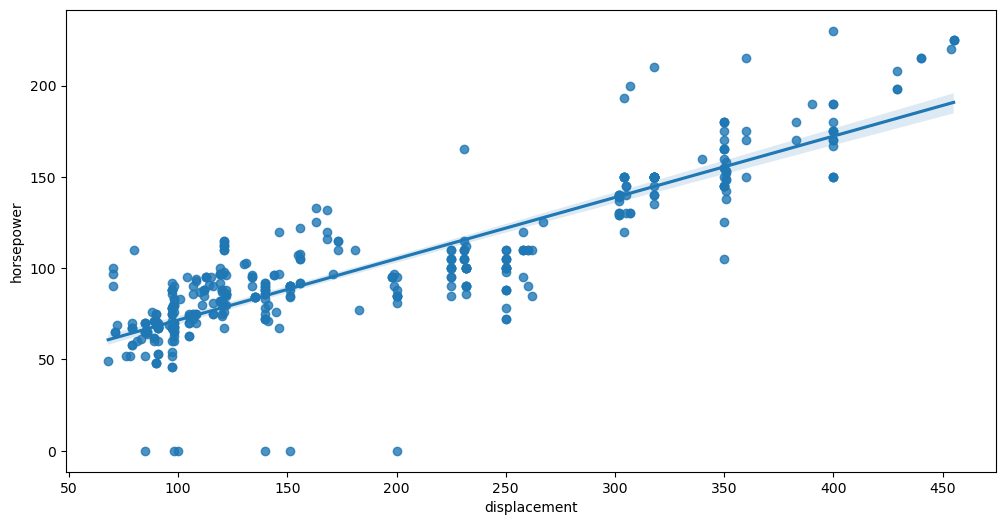

In [59]:
## maker와 다른 속성과의 상관관계.
plt.figure(figsize=(12,6))

xdata = sdf['displacement']
ydata = sdf['horsepower']

sns.regplot(x=xdata,y=ydata)
# sns.scatterplot(x=xdata,y=ydata)

# bsr = [xdata.min(),ydata[xdata.idxmin]]
sns.barplot()

In [60]:
sdf

,displacement,horsepower,maker
0,307.0,130.0,chevrolet
1,350.0,165.0,buick
2,318.0,150.0,plymouth
3,304.0,150.0,amc
4,302.0,140.0,ford
...,...,...,...
399,119.0,82.0,chevy
400,140.0,86.0,ford
401,97.0,86.0,vw
402,232.0,86.0,ford


<Figure size 1200x600 with 0 Axes>

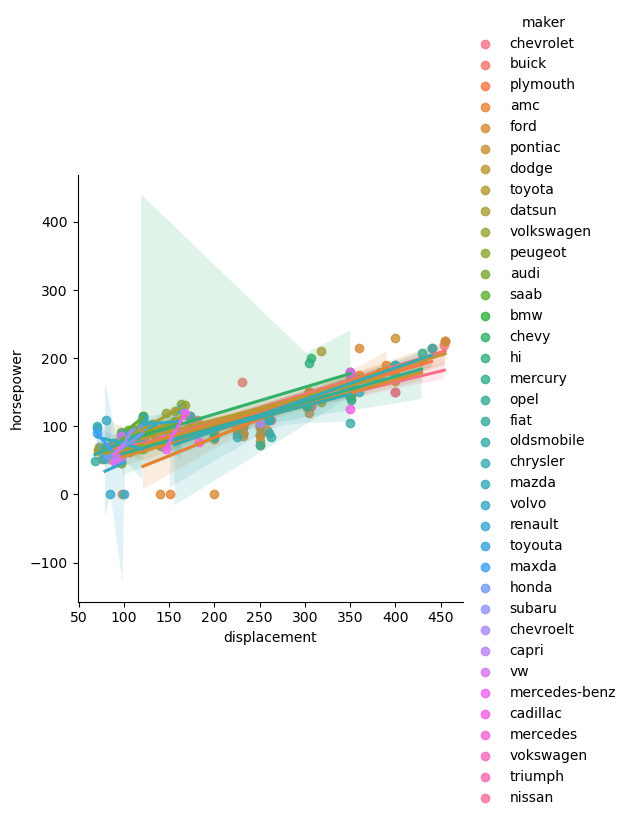

In [63]:
## maker와 다른 속성과의 상관관계.
plt.figure(figsize=(12,6))

xdata = sdf['displacement']
ydata = sdf['horsepower']
category = sdf['maker']

sns.lmplot(x='displacement',y='horsepower', data=sdf, hue = 'maker')
# sns.scatterplot(x=xdata,y=ydata)

# bsr = [xdata.min(),ydata[xdata.idxmin]]

<Axes: xlabel='weight', ylabel='Count'>

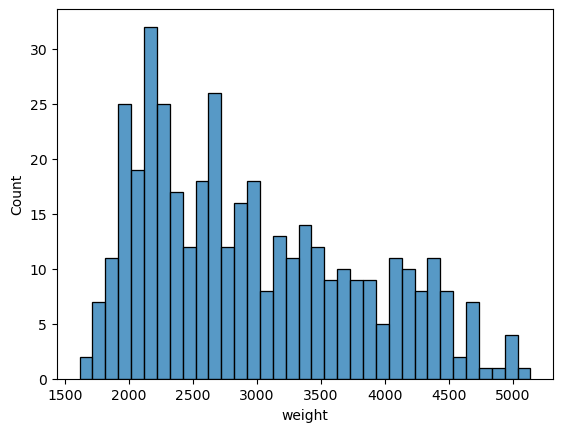

In [74]:
# sns.histplot(x = mpgDF.index, y ='weight', data= mpgDF, binwidth=(10,10))
sns.histplot(x=mpgDF['weight'], data=mpgDF, binwidth=100)

<Axes: xlabel='weight', ylabel='displacement'>

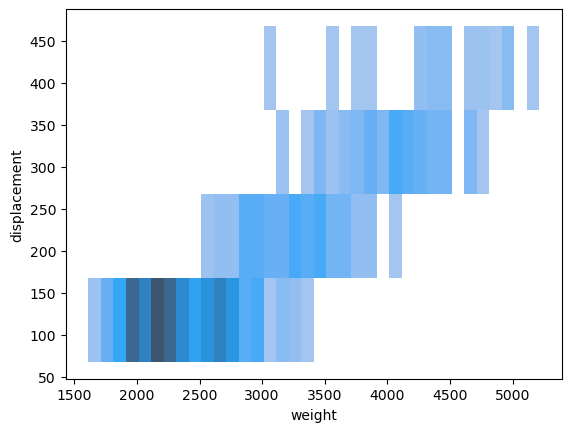

In [76]:
sns.histplot(x=mpgDF['weight'], y=mpgDF['displacement'], data=mpgDF, binwidth=100)

<Axes: ylabel='weight'>

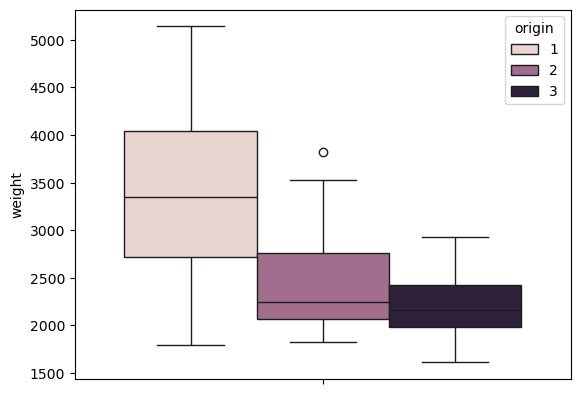

In [87]:
# sns.boxplot(x='weight',y='displacement', data=mpgDF, hue='origin')
sns.boxplot(y='weight', data=mpgDF, hue='origin')

In [ ]:
## maker와 다른 속성과의 상관관계.
plt.figure(figsize=(12,6))


xdata = sdf['displacement']
ydata = sdf['horsepower']
category = sdf['maker']

sns.lmplot(x='displacement',y='horsepower', data=sdf, hue = 'maker')
# sns.scatterplot(x=xdata,y=ydata)

# bsr = [xdata.min(),ydata[xdata.idxmin]]